<a href="https://colab.research.google.com/github/naval55/stock_prediction/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [3]:
nflx = pd.read_csv('../content/input/NFLX.csv')
nflx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [5]:
nflx = nflx[['Date','Open','Close']]
nflx['Date'] = pd.to_datetime(nflx['Date'].apply(lambda x: x.split()[0]))
nflx.set_index('Date',drop=True,inplace=True)
nflx.head()

<ipython-input-5-1d0f88186a61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nflx['Date'] = pd.to_datetime(nflx['Date'].apply(lambda x: x.split()[0]))


,Open,Close
Date,,
2002-05-23,1.156429,1.196429
2002-05-24,1.214286,1.210000
2002-05-28,1.213571,1.157143
2002-05-29,1.164286,1.103571
2002-05-30,1.107857,1.071429


In [6]:
MMS = MinMaxScaler()
nflx[nflx.columns] = MMS.fit_transform(nflx)

In [7]:
nflx.shape

(5044, 2)

In [8]:
a_dimensions = round(len(nflx) * 0.70)
a_dimensions

3531

In [9]:
data_training = nflx[:a_dimensions]
data_testing  = nflx[a_dimensions:]

data_training.shape, data_testing.shape

((3531, 2), (1513, 2))

In [10]:

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [11]:
a_num, a_val = create_sequence(data_training)
b_num, b_val = create_sequence(data_testing)

In [12]:
a_num.shape, a_val.shape, b_num.shape, b_val.shape

((3481, 50, 2), (3481, 2), (1463, 50, 2), (1463, 2))

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [14]:
main = Sequential()
main.add(LSTM(units=50, return_sequences=True, input_shape = (a_num.shape[1], a_num.shape[2])))

main.add(Dropout(0.1)) 
main.add(LSTM(units=50))

main.add(Dense(2))

main.compile(loss='mse', optimizer='adam', metrics=['mae'])

main.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [15]:
main.fit(a_num, a_val, epochs=25,validation_data=(b_num, b_val), verbose=1)

Epoch 1/25
109/109 [==============================] - 25s 167ms/step - loss: 1.1370e-04 - mae: 0.0055 - val_loss: 0.0069 - val_mae: 0.0600
Epoch 2/25
109/109 [==============================] - 9s 80ms/step - loss: 2.1591e-05 - mae: 0.0027 - val_loss: 0.0103 - val_mae: 0.0780
Epoch 3/25
109/109 [==============================] - 7s 68ms/step - loss: 1.9712e-05 - mae: 0.0027 - val_loss: 0.0053 - val_mae: 0.0519
Epoch 4/25
109/109 [==============================] - 8s 75ms/step - loss: 1.7647e-05 - mae: 0.0025 - val_loss: 0.0077 - val_mae: 0.0663
Epoch 5/25
109/109 [==============================] - 8s 78ms/step - loss: 1.6280e-05 - mae: 0.0025 - val_loss: 0.0050 - val_mae: 0.0509
Epoch 6/25
109/109 [==============================] - 7s 68ms/step - loss: 1.7264e-05 - mae: 0.0026 - val_loss: 0.0058 - val_mae: 0.0581
Epoch 7/25
109/109 [==============================] - 9s 80ms/step - loss: 1.5219e-05 - mae: 0.0023 - val_loss: 0.0059 - val_mae: 0.0594
Epoch 8/25
109/109 [===================

In [16]:
precdn_testing = main.predict(b_num)
precdn_testing[:5]

46/46 [==============================] - 2s 17ms/step


array([[0.13738745, 0.13856877],
       [0.13775241, 0.13890503],
       [0.13813971, 0.13926561],
       [0.13818066, 0.13929836],
       [0.13824114, 0.1393549 ]], dtype=float32)

In [17]:
invrs_predn = MMS.inverse_transform(precdn_testing)
invrs_predn[:5]

array([[95.446144, 96.16783 ],
       [95.698685, 96.40029 ],
       [95.96668 , 96.64957 ],
       [95.99502 , 96.67221 ],
       [96.03687 , 96.71129 ]], dtype=float32)

In [18]:
predn_main = pd.concat([nflx.iloc[-1463:].copy(),pd.DataFrame(invrs_predn,columns=['predn_open','predn_close'],index=nflx.iloc[-1463:].index)], axis=1)

In [19]:
predn_main[['Open','Close']] = MMS.inverse_transform(predn_main[['Open','Close']])

In [20]:
predn_main.head()

,Open,Close,predn_open,predn_close
Date,,,,
2016-08-12,95.529999,96.589996,95.446144,96.167831
2016-08-15,96.830002,95.309998,95.698685,96.400291
2016-08-16,95.190002,95.120003,95.966682,96.649567
2016-08-17,94.940002,96.370003,95.995018,96.672211
2016-08-18,95.980003,96.160004,96.036873,96.711288


In [21]:
predn_main = predn_main.append(pd.DataFrame(columns=predn_main.columns,index=pd.date_range(start=predn_main.index[-1], periods=11, freq='D', closed='right')))

In [22]:
predn_main['2022-05-31	':'2022-06-08']

,Open,Close,predn_open,predn_close
2022-05-31,196.179993,197.440002,186.274185,188.529861
2022-06-01,198.699997,192.910004,189.275864,191.486740
2022-06-02,192.020004,205.089996,191.581787,193.783600
2022-06-03,200.139999,198.979996,193.896240,196.122467
2022-06-04,NaN,NaN,NaN,NaN
2022-06-05,NaN,NaN,NaN,NaN
2022-06-06,NaN,NaN,NaN,NaN
2022-06-07,NaN,NaN,NaN,NaN
2022-06-08,NaN,NaN,NaN,NaN


In [23]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=predn_main.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)


In [24]:
curr_seq = b_num[-1:]

for i in range(-10,0):
  up_pred = main.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(b_num[-1:].shape)

1/1 [==============================] - 0s 32ms/step


In [25]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

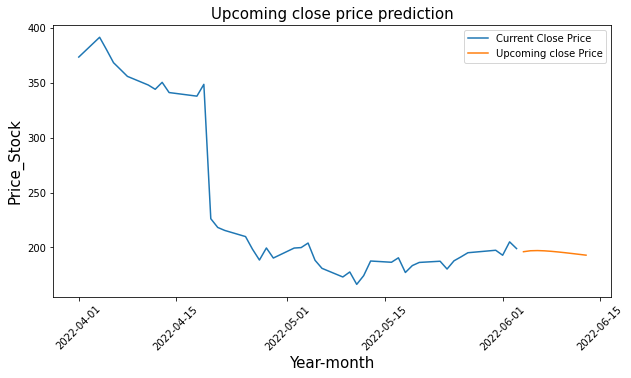

In [26]:
fg,nn=plt.subplots(figsize=(10,5))
nn.plot(predn_main.loc['2022-04-01':,'Close'],label='Current Close Price')
nn.plot(upcoming_prediction.loc['2022-04-01':,'Close'],label='Upcoming close Price')
plt.setp(nn.xaxis.get_majorticklabels(), rotation=45)
nn.set_xlabel('Year-month',size=15)
nn.set_ylabel('Price_Stock',size=15)
nn.set_title('Upcoming close price prediction',size=15)
nn.legend()
fg.show()